In [4]:
import nltk
from nltk.corpus import stopwords, twitter_samples 
nltk.download('twitter_samples')
from utils import process_tweet, build_freqs
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Chinmay\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [5]:
positive_tweets= twitter_samples.strings('positive_tweets.json')
negative_tweets= twitter_samples.strings('negative_tweets.json')

In [6]:
train_pos = positive_tweets[:4000]
test_pos = positive_tweets[4000:]
train_neg = negative_tweets[:4000]
test_neg = negative_tweets[4000:]

In [7]:
train_x = train_pos + train_neg
test_x = test_neg + test_neg

In [8]:

train_y = np.append(np.ones((len(train_pos),1)),np.zeros((len(train_neg),1)),axis=0)
test_y = np.append(np.ones((len(test_pos),1)),np.zeros((len(test_neg),1)),axis=0)

In [12]:
np.squeeze(train_y)

array([1., 1., 1., ..., 0., 0., 0.])

In [25]:
#Table of counts, let us calculate the words, its positive count an dnegative count

keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛','song', 'idea', 'power', 'play', 'magnific']

lst=[]
for key in keys:
    if (key,1) in freqs:
        pos_count = freqs[(key,1)]
        
    if (key,0) in freqs:
        neg_count = freqs[(key,0)]
        
    lst.append((key,pos_count,neg_count))    

In [26]:
lst
#Happi arrives 161 times in positve and 18 in negative

[('happi', 161, 18),
 ('merri', 1, 18),
 ('nice', 70, 17),
 ('good', 191, 83),
 ('bad', 14, 54),
 ('sad', 5, 100),
 ('mad', 3, 8),
 ('best', 49, 16),
 ('pretti', 17, 12),
 ('❤', 21, 15),
 (':)', 2847, 2),
 (':(', 1, 3663),
 ('😒', 1, 3),
 ('😬', 1, 2),
 ('😄', 3, 1),
 ('😍', 1, 1),
 ('♛', 1, 210),
 ('song', 16, 25),
 ('idea', 23, 8),
 ('power', 6, 5),
 ('play', 37, 39),
 ('magnific', 1, 39)]

C:\Users\Chinmay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chinmay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56850 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chinmay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chinmay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128556 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\Chinmay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chinmay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56845 

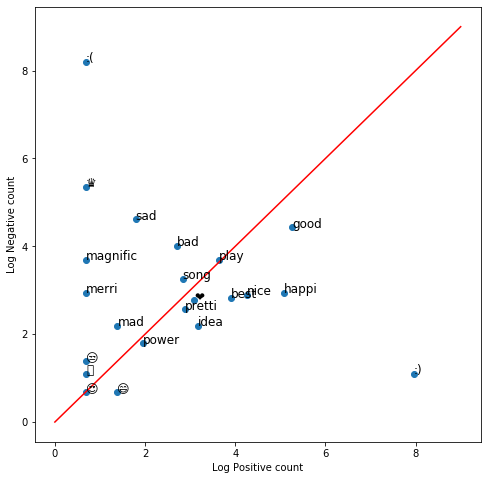

In [31]:

fig, ax = plt.subplots(figsize = (8, 8))

x = np.log([x[1] + 1 for x in lst])  

y = np.log([x[2] + 1 for x in lst]) 

ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")


for i in range(0, len(lst)):
    ax.annotate(lst[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()


In [ ]:
#we can clearly see that emoji plays important role in sentimental analysis

In [41]:
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

print(build_freqs(train_x[0:2],train_y[0:2]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']
{('followfriday', 1.0): 1, ('top', 1.0): 1, ('engag', 1.0): 1, ('member', 1.0): 1, ('commun', 1.0): 1, ('week', 1.0): 1, (':)', 1.0): 2, ('hey', 1.0): 1, ('jame', 1.0): 1, ('odd', 1.0): 1, (':/', 1.0): 1, ('pleas', 1.0): 1, ('call', 1.0): 1, ('contact', 1.0): 1, ('centr', 1.0): 1, ('02392441234', 1.0): 1, ('abl', 1.0): 1, ('assist', 1.0): 1, ('mani', 1.0): 1, ('thank', 1.0): 1}


In [ ]:
#NAIVE BAYES

In [23]:
# get the sets of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# split the data into two pieces, one for training and one for testing (validation set) 
test_pos   = all_positive_tweets[4000:]
train_pos  = all_positive_tweets[:4000]
test_neg   = all_negative_tweets[4000:]
train_neg  = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x  = test_pos + test_neg

# avoid assumptions about the length of all_positive_tweets
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y  = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

In [34]:
#we need to build dictionary that contains words belonging to class and their frequenct

def count_tweets(result,tweets,ys):
    '''
    this takes y values and train tweets and returns result which has (word,y_val):freq_of_word
    '''
    dic_unique=set()
    for y,tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            dic_unique.add(word)
            pair = (word, y)
            if pair in result:
                result[pair] += 1
                
            else:
                result[pair] = 1
    
    return (result,dic_unique)



In [19]:
#testing

result = {}
tweets = ['i am happy', 'i am tricked', 'i am sad', 'i am tired', 'i am thrilled and happy']
ys = [1,0,0,0,1]
count_tweets(result, tweets, ys)


{('happi', 1): 2,
 ('trick', 0): 1,
 ('sad', 0): 1,
 ('tire', 0): 1,
 ('thrill', 1): 1}

{1, 2}

In [35]:
freqs,unique_words = count_tweets({}, train_x, train_y)

In [39]:
V=len(unique_words)

In [60]:
sum_pos=sum_neg=0
v_pos=v_neg=0

for key, freq in freqs.items():
    if key[1]==1.0:
        sum_pos=sum_pos+freq
        v_pos+=1
    if key[1]==0.0:
        sum_neg=sum_neg+freq
        v_neg+=1

In [62]:
N_pos=N_neg=V_pos=V_neg=0
for pair in freqs.keys():
        # if the label is positive (greater than zero)
    if pair[1]>0:
        
            # increment the count of unique positive words by 1
        V_pos += 1
            
            # Increment the number of positive words by the count for this (word, label) p
        N_pos += freqs.get(pair)
       
    
        # else, the label is negative
    else: 
            # increment the count of unique negative words by 1
        V_neg += 1
            
            # increment the number of negative words by the count for this (word,label) pair
        N_neg += freqs.get(pair)


In [64]:
#The prior probability is the ratio of the probabilities P(Dpos)/P(Dneg)---> log(P(Dpos)/P(Dneg))----->log(p(Dpos)-log(p(Dneg))

(5611, 5611)

In [69]:
D = len(train_y)
D_pos = sum(i==1.0 for  i in  train_y)
D_neg = D-D_pos
logprior  = np.log(D_pos/D) - np.log(D_neg/D)
    

In [103]:
#we need to get the freq of word belonging to that class
def get_freq_word(freqs,word,clss):
    if (word,clss) in freqs:
        return freqs.get((word,clss))
    else:
        return 0


loglikelihood={}
logprior  = np.log(D_pos/D) - np.log(D_neg/D)
    
for word in unique_words:    
    pos_word_freq = get_freq_word(freqs,word,1.0)
    p_w_pos = (pos_word_freq + 1)/(N_pos + V)

    neg_word_freq = get_freq_word(freqs,word,0.0)
    
    p_w_neg = (neg_word_freq + 1)/(N_neg + V)
    loglikelihood[word] = np.log(p_w_pos) - np.log(p_w_neg)

    ### END CODE HERE ### 
    
    

In [105]:
loglikelihood

{'height': -0.40005316367209254,
 'airdroid': -0.6877352361238742,
 'fieldtrip': -0.6877352361238742,
 'signatur': -0.6877352361238742,
 'comic': -0.6877352361238742,
 'mater': 0.6985591249960166,
 '∞': 0.6985591249960166,
 'mak': 0.6985591249960166,
 'austin': 0.005411944436071181,
 'discharg': 0.6985591249960166,
 'fightingmciren': -0.6877352361238742,
 'eat': -1.5632039734777727,
 'aameen': 0.6985591249960166,
 'anon': -1.093200344232038,
 'ourdaughtersourprid': 1.391706305555962,
 'ganda': 0.005411944436071181,
 'honestli': 0.005411944436071181,
 "sculptor'": 0.6985591249960166,
 'israel': -0.6877352361238742,
 'fridayfeel': 1.104024233104182,
 'miss': -2.5848552210097537,
 'likewis': 0.9217026763102272,
 'roux': 0.6985591249960166,
 'kawaii': -0.6877352361238742,
 'gv': -0.6877352361238742,
 'dudafti': 0.6985591249960166,
 '75x': 0.6985591249960166,
 'engag': 2.0848534861159074,
 'rec': 0.6985591249960166,
 'seen': -0.8212666287483961,
 'avoid': -1.093200344232038,
 'websit': 0.13

In [115]:
def test(tweet):
    p=0
    for word in process_tweet(tweet):
        p+=loglikelihood[word]
    print(p)


In [116]:
test('i am happy i did not go')

1.7457651034580328


In [119]:
test('i am sad  i did not go')

-3.220753300221114
